# Assignment 1



Double click to write your **name and student number** here:

> Bloque con sangría



Write the **name and number of your dataset** here:

The datasets (1=deposit.csv, 2=bill_authentication.csv, 3=Income.csv) 

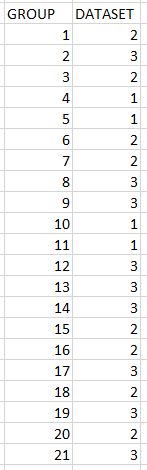

To make sure you are starting to get used to Python and the relevant packages and functions, we ask you to perform a number of data analyses and answer the questions below. Do not forget to revisit the exercise sessions and Python documentation whenever you get stuck. 

## Question 1 



First, upload your data set in Python. Use the Matplotlib package to explore the data visually. 

1. Convert the data set to a dataframe and save the result as a variable. 
2. Print the dataframe, what can you say about its shape?
3. Use the data from the dataframe to generate at least one figure of a       **scatter** chart with one variable on the x-axis and another one the y-axis. 
4. Describe the figure and indicate what you learn from it.  


In [2]:
# Code to upload the file 

from google.colab import files
uploaded = files.upload()

Saving deposit.csv to deposit (1).csv


In [9]:
# Code for exercises 1.1 and 1.2

# importing pandas library
import pandas as pd
# importing matplotlib library
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("deposit.csv", delimiter=",")

print(df)

      age         job  marital  education default  balance housing loan  \
0      33      admin.  married   tertiary      no      882      no   no   
1      33    services  married  secondary      no     3444     yes   no   
2      36  management  married   tertiary      no        0     yes   no   
3      56  technician  married  secondary      no      589     yes   no   
4      51      admin.   single  secondary      no     3132      no   no   
...   ...         ...      ...        ...     ...      ...     ...  ...   
6128   59  management  married   tertiary      no      138     yes  yes   
6129   68     retired  married  secondary      no     1146      no   no   
6130   53  management  married   tertiary      no      583      no   no   
6131   73     retired  married  secondary      no     2850      no   no   
6132   72     retired  married  secondary      no     5715      no   no   

      campaign  pdays  previous poutcome    y  
0            1    151         3  failure   no  
1  

In [4]:
df.y.value_counts()

no     4629
yes    1504
Name: y, dtype: int64

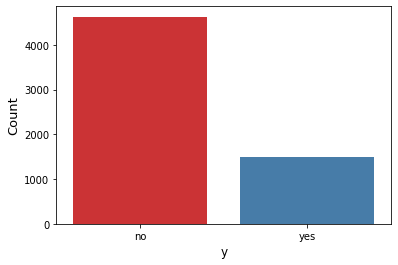

In [10]:
sns.countplot(x = 'y', data=df,palette='Set1')
plt.xlabel('y', fontsize=12)
plt.ylabel('Count', fontsize=13)
plt.show()

In [5]:
dfy = df.loc[df['y']=='yes']
dfn = df.loc[df['y']=='no']

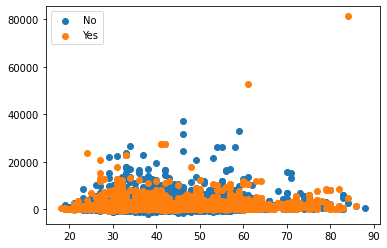

In [6]:
# Code for exercises 1.3 and 1
plt.scatter(dfn["age"], dfn["balance"], label='No')

plt.scatter(dfy["age"], dfy["balance"], label='Yes')
plt.legend(loc=2)


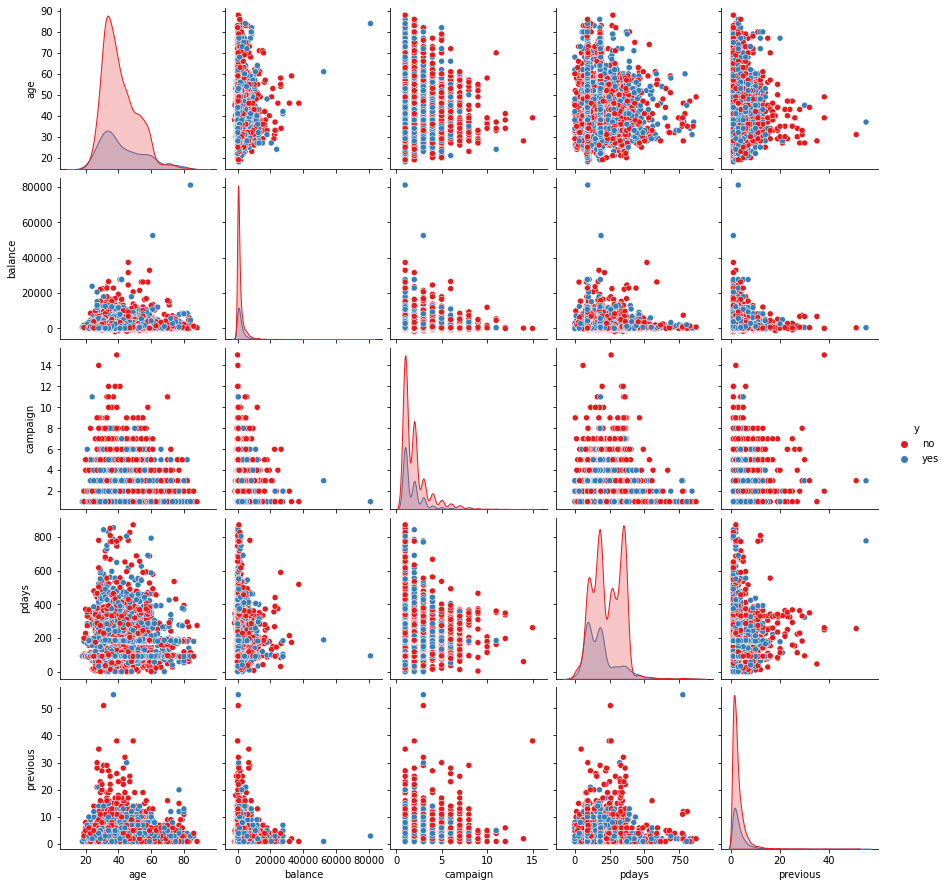

In [11]:
sns.pairplot(df,hue='y',palette='Set1', diag_kind = 'kde',)

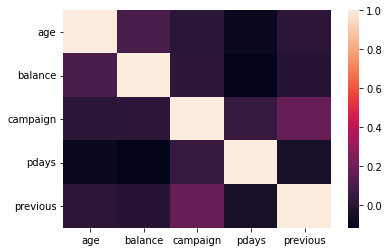

In [12]:
sns.heatmap(df.corr())

In [ ]:
df.poutcome.value_counts()

failure    4709
success    1424
Name: poutcome, dtype: int64

Text(0, 0.5, 'Poutcome')

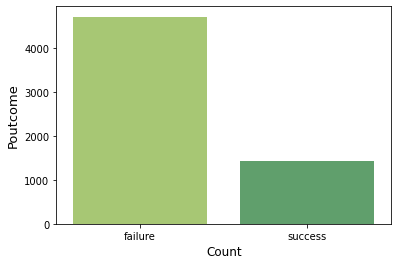

In [ ]:
sns.countplot(x='poutcome', data=df, palette='summer_r')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Poutcome', fontsize=13)

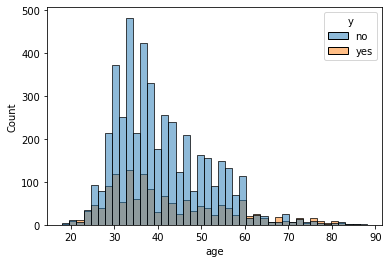

In [ ]:
sns.histplot(x=df.age, hue=df.y)

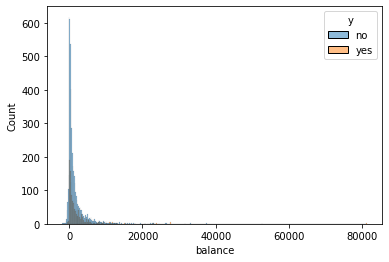

In [ ]:
sns.histplot(x=df.balance, hue=df.y)

## Question 2 

Create a decision tree model to classify the outcome variable. To do so, use the "DecisionTreeClassifier" function from the Scikit-package. Follow the steps below to analyse the influence of the different hyperparameters on the resulting decision trees by changing the default values. 

1.   Create and save a decision tree with the default parameters given by sklearn. Plot the resulting tree. How many leaf nodes does the tree have? Are they pure? 
2.   Create and save a decision tree with a maximum depth of 4 (while keeping other parameters to their default value). Plot the resulting tree. What is the effect of changing the maximum depth? Compare to the first tree. What does this imply for the classification of the output variable? 
3. Create and save a decision tree with a maximum of 4 leaf nodes (while keeping other parameters to their default value). Plot the resulting tree. What is the effect of changing the maximum number of leaf nodes?
4. According to you, what is the influence of changing the maximum depth and number of leaf nodes on the generalization performance of the decision tree? (Max. 2 sentences).

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.tree import export_graphviz


df.sample(10)

,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
5760,38,services,married,secondary,no,4017,no,no,1,96,3,success,yes
4838,32,services,married,secondary,no,914,no,no,1,197,1,success,no
3687,29,admin.,single,secondary,no,460,yes,no,2,357,6,success,no
3942,42,unemployed,married,tertiary,no,576,no,no,2,96,1,success,yes
4604,30,technician,single,secondary,no,853,no,no,1,148,1,failure,yes
4531,40,technician,married,secondary,no,2266,no,no,1,147,5,failure,yes
4930,82,housemaid,divorced,primary,no,1381,no,no,3,93,1,failure,no
651,52,management,married,tertiary,no,2428,yes,no,1,116,3,failure,no
3972,28,management,single,secondary,no,171,no,no,1,87,1,success,yes
3980,35,management,married,tertiary,no,697,no,no,2,304,1,failure,no


In [15]:
# Que categorias tiene value_counts()
df.job.value_counts()

management       1385
blue-collar      1170
technician       1008
admin.            825
services          514
retired           382
self-employed     210
entrepreneur      175
unemployed        173
student           168
housemaid         123
Name: job, dtype: int64

In [16]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [17]:
df_dummies = pd.get_dummies(data=df, drop_first=True)
df_dummies.columns

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'poutcome_success', 'y_yes'],
      dtype='object')

In [18]:
y = df_dummies['y_yes']
X = df_dummies.drop(['y_yes', ], axis=1)

In [21]:
X.sample(4)

,age,balance,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,poutcome_success
103,40,1029,2,117,3,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
395,56,-429,2,119,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1144,59,941,1,210,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
2671,52,26,2,368,1,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [52]:
from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier( max_depth=4)
model = DecisionTreeClassifier( max_leaf_nodes=5, max_depth=4)
# model = DecisionTreeClassifier()

model.fit(X,y)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5)

In [53]:
col_names_list = list(X.columns.values)
print ("X: ", col_names_list)

X:  ['age', 'balance', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'default_yes', 'housing_yes', 'loan_yes', 'poutcome_success']


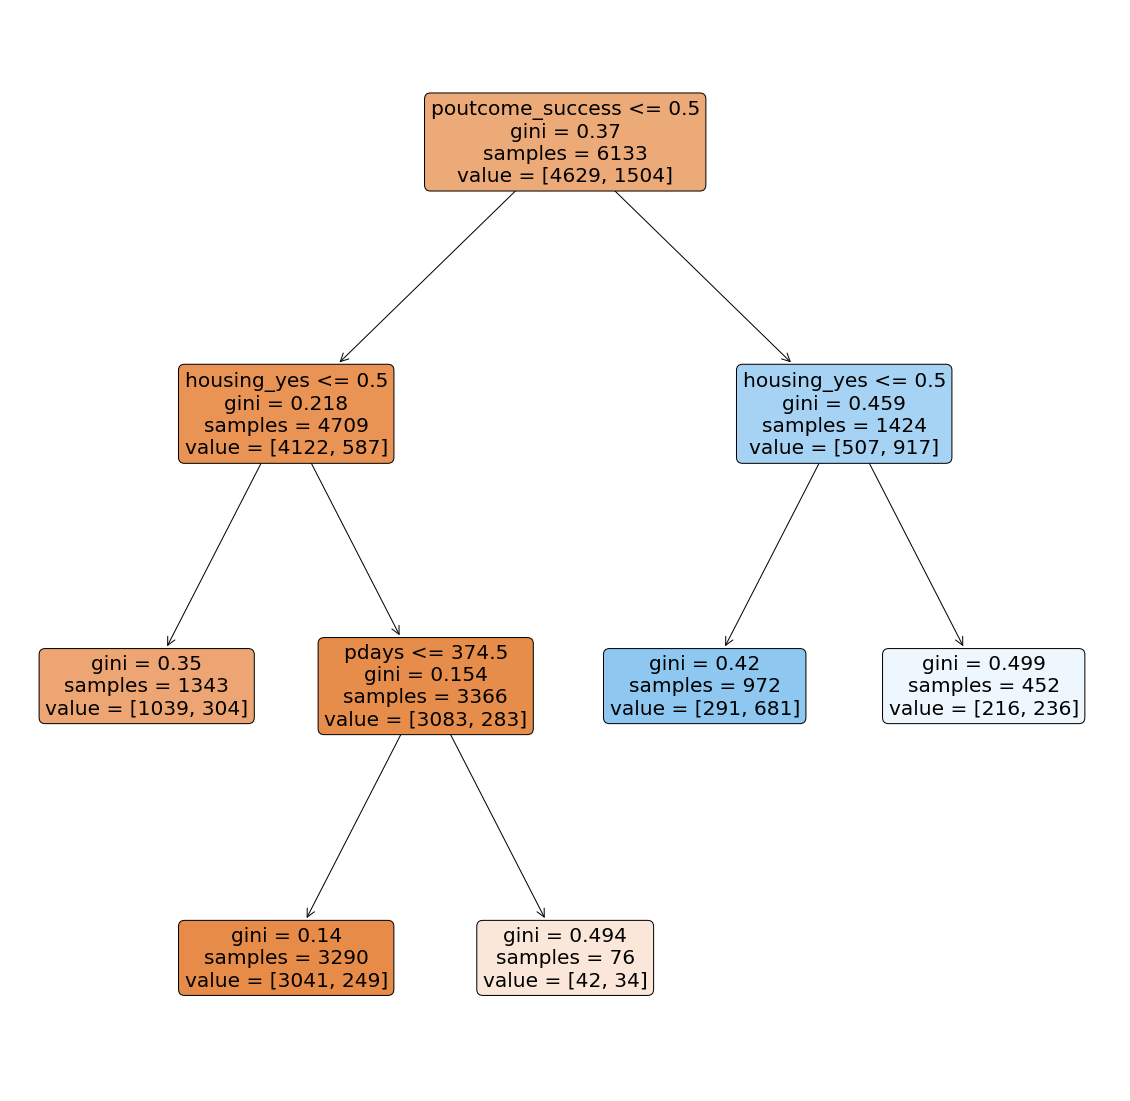

In [54]:
fig = plt.figure(figsize=(20,20))
tree.plot_tree(model, filled=True, rounded=True,  feature_names=col_names_list)
plt.show()

In [42]:
# Export to pdf
export_graphviz(model, out_file='tree.dot', filled=True, 
               rounded=True, special_characters=True, feature_names=col_names_list)

# Convertimos el arbol en Imagen
! dot -Tpdf tree.dot -o tree.pdf
! dot -Tpng tree.dot -o tree.png

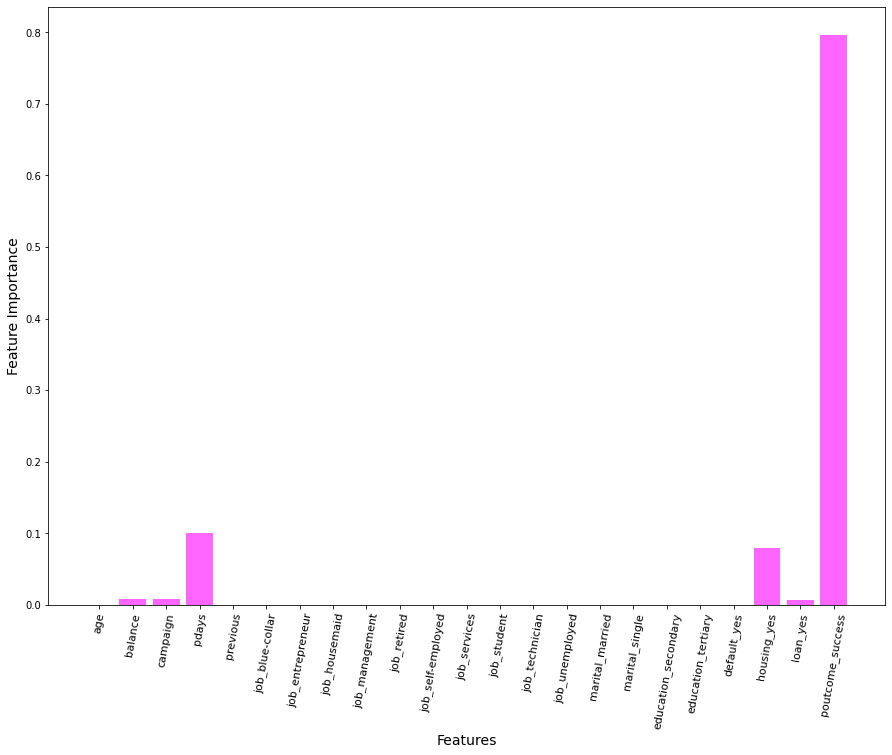

In [43]:
n_features = len(col_names_list)

fig = plt.figure(figsize=(15, 11))
fig.tight_layout()
plt.bar(range(n_features), model.feature_importances_, color="magenta", align="center", alpha=0.6)
plt.xticks(np.arange(n_features), col_names_list, rotation=80, fontsize=11)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Feature Importance", fontsize=14)
plt.savefig("Feature_Importance.png", dpi=300, bbox_inches='tight')# xticks are not clipped with 'bbox'

In [55]:
# Valor aleatorio
a = X.sample()

In [56]:
print(a)

      age  balance  campaign  pdays  previous  job_blue-collar  \
5774   34      661         2    183        10                0   

      job_entrepreneur  job_housemaid  job_management  job_retired  ...  \
5774                 0              0               0            0  ...   

      job_technician  job_unemployed  marital_married  marital_single  \
5774               0               0                0               0   

      education_secondary  education_tertiary  default_yes  housing_yes  \
5774                    1                   0            0            1   

      loan_yes  poutcome_success  
5774         0                 0  

[1 rows x 23 columns]


In [57]:
model.predict_proba(a)

array([[0.92431611, 0.07568389]])

In [58]:
print( "Yes accept the deposit", model.predict_proba(a)[0][1])

Yes accept the deposit 0.0756838905775076


In [ ]:
# Code exercise 2.2

In [ ]:
# Code exercise 2.3

Text exercise 2.4 (max 50 words)

## Question 3



Look back at the plot of the decision tree with default parameters and answer the following questions. 



1.   How do you interpret the first splitting condition derived by Python? What is the influence of the split on the impurity of the samples?
2.   Which category of samples is most easily seperated from the rest? Explain briefly. 



Text exercise 3.1 

Text exercise 3.2